# **[Term Project] 자동차 생산 공정 데이터 분석을 통한 생산성 개선 방안 도출**

# 1. 문제 정의
**"자동차 생산 공정 데이터 분석을 통한 생산성 개선 방안 도출"**

어떤 변수가 현재 생산성에 영향을 미치는지 식별한다.

### **활용 데이터 및 방법론**
* 활용 데이터: 일자별 생산 공정 정보, 작업자 정보 등
* 활용 기법: 히스토그램, 파이 차트, 바이올린 도표, 팩터플랏 등 다양한 시각화 기법

# 2. 데이터 준비

## 데이터 불러오기

In [ ]:
!gdown 1AX7tq815PP3FHIBrZZgYJZAt42cAAucf # process.xlsx
!gdown 13fUZ_74qQ9b1KhIlVRU7KuDygxCW6Nxa # worker.xlsx

Downloading...
From: https://drive.google.com/uc?id=1AX7tq815PP3FHIBrZZgYJZAt42cAAucf
To: /content/process.xlsx
100% 152k/152k [00:00<00:00, 86.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=13fUZ_74qQ9b1KhIlVRU7KuDygxCW6Nxa
To: /content/worker.xlsx
100% 11.8k/11.8k [00:00<00:00, 33.5MB/s]


In [ ]:
import pandas as pd

process_df = pd.read_excel('process.xlsx')
process_df

,작업일자,설비,근무조,모델,생산수량,가동률,시간가동률,성능가동률,불량수량,작업자_사번
0,2022-01-01,LINE_A,주간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,LINE_A,야간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,LINE_B,주간,플러그인투싼,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,LINE_B,야간,플러그인투싼,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,LINE_C,주간,투싼,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2187,2022-12-31,LINE_A,야간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN
2188,2022-12-31,LINE_B,주간,플러그인투싼,394.0,0.915809,0.998485,0.597876,35.0,19930615.0
2189,2022-12-31,LINE_B,야간,플러그인투싼,328.0,0.643066,0.701515,0.708423,3.0,20081301.0
2190,2022-12-31,LINE_C,주간,투싼,515.0,0.851909,0.928788,0.840131,35.0,20180147.0


In [ ]:
worker_df = pd.read_excel('worker.xlsx')
worker_df

,사번,성명,나이,성별,최종학력,입사일자
0,19952583,김태윤,49,여,전문대학,1995-12-23
1,20131075,장건우,33,여,고등학교,2013-12-17
2,20081301,정승민,35,여,고등학교,2008-11-30
3,20182784,김서진,30,남,전문대학,2018-11-16
4,20181153,박서준,29,남,대학,2018-11-17
5,20202866,류준혁,28,남,고등학교,2020-11-3
6,20031955,류유찬,43,남,대학,2003-10-22
7,20081219,임시현,37,여,고등학교,2008-10-22
8,19930615,이이안,52,여,고등학교,1993-9-17
9,20010966,송수호,46,남,대학,2001-9-21


In [ ]:
merged_df = pd.merge(process_df, worker_df, left_on='작업자_사번', right_on='사번', how='left')
merged_df

,작업일자,설비,근무조,모델,생산수량,가동률,시간가동률,성능가동률,불량수량,작업자_사번,사번,성명,나이,성별,최종학력,입사일자
0,2022-01-01,LINE_A,주간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,LINE_A,야간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,LINE_B,주간,플러그인투싼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,LINE_B,야간,플러그인투싼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,LINE_C,주간,투싼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2022-12-31,LINE_A,야간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,2022-12-31,LINE_B,주간,플러그인투싼,394.0,0.915809,0.998485,0.597876,35.0,19930615.0,19930615.0,이이안,52.0,여,고등학교,1993-9-17
2189,2022-12-31,LINE_B,야간,플러그인투싼,328.0,0.643066,0.701515,0.708423,3.0,20081301.0,20081301.0,정승민,35.0,여,고등학교,2008-11-30
2190,2022-12-31,LINE_C,주간,투싼,515.0,0.851909,0.928788,0.840131,35.0,20180147.0,20180147.0,이도윤,30.0,남,전문대학,2018-6-26


In [ ]:
#요약 정보 확인
pd.set_option('display.float_format', lambda x: '%.3f' % x)
merged_df.shape
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    2192 non-null   datetime64[ns]
 1   설비      2192 non-null   object        
 2   근무조     2192 non-null   object        
 3   모델      2192 non-null   object        
 4   생산수량    1646 non-null   float64       
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   float64       
 9   작업자_사번  1646 non-null   float64       
 10  사번      1646 non-null   float64       
 11  성명      1646 non-null   object        
 12  나이      1646 non-null   float64       
 13  성별      1646 non-null   object        
 14  최종학력    1646 non-null   object        
 15  입사일자    1646 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 291.1+ KB


,생산수량,가동률,시간가동률,성능가동률,불량수량,작업자_사번,사번,나이
count,1646.000,1646.000,1646.000,1646.000,1646.000,1646.000,1646.000,1646.000
mean,386.519,0.760,0.829,0.716,12.917,20088846.256,20088846.256,37.545
std,138.651,0.112,0.122,0.246,12.417,87749.006,87749.006,7.940
min,74.000,0.347,0.379,0.113,0.000,19911022.000,19911022.000,25.000
25%,289.000,0.702,0.765,0.571,3.000,20011793.000,20011793.000,32.000
50%,404.500,0.786,0.858,0.757,8.000,20081301.000,20081301.000,36.000
75%,488.000,0.839,0.915,0.890,20.000,20180147.000,20180147.000,43.000
max,745.000,0.917,1.000,1.282,68.000,20212354.000,20212354.000,54.000


## 데이터 전처리

In [ ]:
#sweetviz 활용 데이터 파악

#sweetviz 설치
!pip install sweetviz

In [ ]:
import sweetviz as sv

report = sv.analyze(merged_df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transp

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#요약 정보 확인
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    2192 non-null   datetime64[ns]
 1   설비      2192 non-null   object        
 2   근무조     2192 non-null   object        
 3   모델      2192 non-null   object        
 4   생산수량    1646 non-null   float64       
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   float64       
 9   작업자_사번  1646 non-null   float64       
 10  사번      1646 non-null   float64       
 11  성명      1646 non-null   object        
 12  나이      1646 non-null   float64       
 13  성별      1646 non-null   object        
 14  최종학력    1646 non-null   object        
 15  입사일자    1646 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 291.1+ KB


**확인 결과**

   * 생산수량 ~ 입사일자  에서 각 546개의 결측치 발생
   * 모델에서 '플러그인 투싼, 플러그인투싼' 같은 모델이지만, 띄어쓰기로 인해 나누어짐
   * 요약정보에서 불필요하게 실수형 데이터로 존재
   * 작업자_사번과 사번의 중복되어 존재

In [ ]:
#결측치 제거를 위해 결측치가 존재하는 행 제거
merged_df= merged_df.dropna(axis=0)

merged_df

,작업일자,설비,근무조,모델,생산수량,가동률,시간가동률,성능가동률,불량수량,작업자_사번,사번,성명,나이,성별,최종학력,입사일자
8,2022-01-02,LINE_B,주간,플러그인투싼,163.000,0.656,0.717,0.345,11.000,19930536.000,19930536.000,윤지후,53.000,여,고등학교,1993-1-16
9,2022-01-02,LINE_B,야간,플러그인투싼,286.000,0.623,0.680,0.637,15.000,20181079.000,20181079.000,강주원,30.000,여,대학,2018-6-1
10,2022-01-02,LINE_C,주간,투싼,343.000,0.440,0.479,1.085,11.000,19962039.000,19962039.000,최민규,49.000,남,전문대학,1996-4-18
11,2022-01-02,LINE_C,야간,투싼,488.000,0.866,0.945,0.782,4.000,20142396.000,20142396.000,정시후,33.000,남,고등학교,2014-4-20
12,2022-01-03,LINE_A,주간,아이오닉,139.000,0.792,0.864,0.244,2.000,20141812.000,20141812.000,손지우,33.000,남,고등학교,2014-6-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2022-12-30,LINE_C,야간,투싼,521.000,0.721,0.786,1.004,36.000,20180147.000,20180147.000,이도윤,30.000,남,전문대학,2018-6-26
2188,2022-12-31,LINE_B,주간,플러그인투싼,394.000,0.916,0.998,0.598,35.000,19930615.000,19930615.000,이이안,52.000,여,고등학교,1993-9-17
2189,2022-12-31,LINE_B,야간,플러그인투싼,328.000,0.643,0.702,0.708,3.000,20081301.000,20081301.000,정승민,35.000,여,고등학교,2008-11-30
2190,2022-12-31,LINE_C,주간,투싼,515.000,0.852,0.929,0.840,35.000,20180147.000,20180147.000,이도윤,30.000,남,전문대학,2018-6-26


In [ ]:
# '모델' 에서 띄어쓰기 제거
merged_df['모델'] = merged_df['모델'].str.replace(' ', '')

<ipython-input-10-5dcead0921d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['모델'] = merged_df['모델'].str.replace(' ', '')


In [ ]:
#생산수량, 불량수량, 작업자_사번, 사번, 나이, 입사일자 데이터 유형 변경
merged_df['생산수량'] = merged_df['생산수량'].astype(int)
merged_df['불량수량'] = merged_df['불량수량'].astype(int)
merged_df['작업자_사번'] = merged_df['작업자_사번'].astype(int)
merged_df['사번'] = merged_df['사번'].astype(int)
merged_df['나이'] = merged_df['나이'].astype(int)
merged_df['입사일자'] = pd.to_datetime(merged_df['입사일자'])
# 바뀐 데이터형 확인
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 8 to 2191
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    1646 non-null   datetime64[ns]
 1   설비      1646 non-null   object        
 2   근무조     1646 non-null   object        
 3   모델      1646 non-null   object        
 4   생산수량    1646 non-null   int64         
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   int64         
 9   작업자_사번  1646 non-null   int64         
 10  사번      1646 non-null   int64         
 11  성명      1646 non-null   object        
 12  나이      1646 non-null   int64         
 13  성별      1646 non-null   object        
 14  최종학력    1646 non-null   object        
 15  입사일자    1646 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(5), object(6)
memory usage: 218.6+ KB


<ipython-input-11-bfbd5d3b37db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['생산수량'] = merged_df['생산수량'].astype(int)
<ipython-input-11-bfbd5d3b37db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['불량수량'] = merged_df['불량수량'].astype(int)
<ipython-input-11-bfbd5d3b37db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
#작업자 사번과 사번을 합치기 위해서 데이터가 동일한지 확인
is_equal = merged_df['작업자_사번'] == merged_df['사번']
count_result = is_equal.value_counts()
if True in count_result:
    print("True의 개수:", count_result[True])
else:
    print("True의 개수: 0")

if False in count_result:
    print("False의 개수:", count_result[False])
else:
    print("False의 개수: 0")

True의 개수: 1646
False의 개수: 0


In [ ]:
#동일한 것을 확인하였으니 '사번' 행을 제거
merged_df.drop('사번', axis=1, inplace=True)

<ipython-input-13-df64f591cc6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop('사번', axis=1, inplace=True)


In [ ]:
#이후 인덱스 재정렬
merged_df = merged_df.reset_index(drop=True)
merged_df

,작업일자,설비,근무조,모델,생산수량,가동률,시간가동률,성능가동률,불량수량,작업자_사번,성명,나이,성별,최종학력,입사일자
0,2022-01-02,LINE_B,주간,플러그인투싼,163,0.656,0.717,0.345,11,19930536,윤지후,53,여,고등학교,1993-01-16
1,2022-01-02,LINE_B,야간,플러그인투싼,286,0.623,0.680,0.637,15,20181079,강주원,30,여,대학,2018-06-01
2,2022-01-02,LINE_C,주간,투싼,343,0.440,0.479,1.085,11,19962039,최민규,49,남,전문대학,1996-04-18
3,2022-01-02,LINE_C,야간,투싼,488,0.866,0.945,0.782,4,20142396,정시후,33,남,고등학교,2014-04-20
4,2022-01-03,LINE_A,주간,아이오닉,139,0.792,0.864,0.244,2,20141812,손지우,33,남,고등학교,2014-06-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,2022-12-30,LINE_C,야간,투싼,521,0.721,0.786,1.004,36,20180147,이도윤,30,남,전문대학,2018-06-26
1642,2022-12-31,LINE_B,주간,플러그인투싼,394,0.916,0.998,0.598,35,19930615,이이안,52,여,고등학교,1993-09-17
1643,2022-12-31,LINE_B,야간,플러그인투싼,328,0.643,0.702,0.708,3,20081301,정승민,35,여,고등학교,2008-11-30
1644,2022-12-31,LINE_C,주간,투싼,515,0.852,0.929,0.840,35,20180147,이도윤,30,남,전문대학,2018-06-26


In [ ]:
#전처리 완료
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    1646 non-null   datetime64[ns]
 1   설비      1646 non-null   object        
 2   근무조     1646 non-null   object        
 3   모델      1646 non-null   object        
 4   생산수량    1646 non-null   int64         
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   int64         
 9   작업자_사번  1646 non-null   int64         
 10  성명      1646 non-null   object        
 11  나이      1646 non-null   int64         
 12  성별      1646 non-null   object        
 13  최종학력    1646 non-null   object        
 14  입사일자    1646 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(4), object(6)
memory usage: 193.0+ KB


# 3. EDA

In [ ]:
#데이터 시각화 준비

#데이터 시각화를 위한 seaborn, matplotlib 설치
!pip install seaborn

# 데이터 시각화 라이브러리 seaborn 불러오기
import seaborn as sns
# 데이터 시각화 라이브러리 matplotlib 불러오기
import matplotlib.pyplot as plt
# matplotlib으로 출력되는 그림을 노트북 안에 출력
%matplotlib inline
# pandas와 matplotlib을 원활하게 연동하기 위한 명령어
pd.plotting.register_matplotlib_converters()

In [ ]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

**데이터 딕셔너리**


| 변수 | 정의	| 설명 | 유형 |
| :-: | :-: | :-: | :-: |
| 작업일자	| 작업을 실시한 일자 |	연-월-일 | date |
| 설비 |	작업이 진행된 설비	| LINE_A , LINE_B , LINE_C | str |
| 근무조	| 교대근무에 따른 근무 |	야간 , 주간 | str |
| 모델 |	생산 모델| 니로 , 소나타 , 아반떼 , 아이오닉 , 투싼 , 플러그인투싼 | str |
| 생산수량 | 생산수량 | 해당 근무조의 생산량 | int |
| 가동률 |	가동시간 / 조업시간 | 전체 조업시간 중 설비가 실제로 가동된 가동시간의 비율 | float |
| 시간가동률 | 가동시간 / 부하시간 | 부하시간 중 설비의 고장 정지, 기종 변경, 자재 품절, 유실 기간 등의 정지시간을 제외한<br>가동시간과 부하시간의 비율로, 설비가 정지 없이 가동되고 있는가를 나타내는 지표 | float |
| 성능가동률 |	(생산량 * 단위생산시간) / 가동시간	| 가동시간 중 설비 목표 성능을 발휘한 시간의 비율 | float |
| 불량수량 | 생산 수량 중 불량 수량	| - | int
| 작업자_사번	| 작업자 사번	| - | int
| 성명	| 작업자 성명 | -	| str |
| 나이	| 작업자 나이 | -	| int |
| 성별	| 작업자 성별 |	남, 여	| str |
| 최종학력 | 작업자 최종학력 |	고등학교 , 전문대학 , 대학	| str |
| 입사일자	| 작업자 입사일자 |	연-월-일	| date |



<br>
<br>

##**해결해야 할 문제는??**
 <br>우리가 해결해야 할 문제는 바로 생산성을 향상 시키는 것이다.<br>
 그러기 위해서, 우리에게 주어진 데이터에서 생산성 지표를 정의해야 한다.

 * 우리가 데이터 분석에서 사용할 생산성 지표를 아래와 같이 정의한다.<br>
 <br>


| 생산성 지표명 | 단위 | 정의 |설명|
| :-: | :-: | :-: | :-: |
|계획충족수율(Planning Satisfy Yield)|%| 시간가동률 * 성능가동률 * (1-불량수량/생산수량) | 가동시간이 부하시간을 얼마나 충족하고, <br>목표한 성능을 발휘해 양품을 생산했는지에 대한 지표| <br>



 <br>


* 이는 0에 가까울수록 목표한 생산계획을 충족하지 못한것이고, 1에 가까울 수록 생산계획을 충족한 것이다.
* 만약, 1을 넘는  값이 나온다면 이것은 목표생산성을 초과한 성과를 보인것이다.
<br>
<br>

In [ ]:
#생산성 지표 정의 및 기존 DataFrame에 추가

psy = merged_df['시간가동률']*merged_df['성능가동률']*(1-(merged_df['불량수량']/merged_df['생산수량']))
merged_df.insert(merged_df.columns.get_loc('불량수량') + 1, '계획충족수율', psy)

#요약통계 확인
merged_df['계획충족수율'].describe()

count   1646.000
mean       0.567
std        0.204
min        0.109
25%        0.423
50%        0.596
75%        0.714
max        1.115
Name: 계획충족수율, dtype: float64

In [ ]:
#데이터의 요약통계 출력
merged_df.describe() #연속형 데이터에 대해서만 출력됨

,생산수량,가동률,시간가동률,성능가동률,불량수량,계획충족수율,작업자_사번,나이
count,1646.000,1646.000,1646.000,1646.000,1646.000,1646.000,1646.000,1646.000
mean,386.519,0.760,0.829,0.716,12.917,0.567,20088846.256,37.545
std,138.651,0.112,0.122,0.246,12.417,0.204,87749.006,7.940
min,74.000,0.347,0.379,0.113,0.000,0.109,19911022.000,25.000
25%,289.000,0.702,0.765,0.571,3.000,0.423,20011793.000,32.000
50%,404.500,0.786,0.858,0.757,8.000,0.596,20081301.000,36.000
75%,488.000,0.839,0.915,0.890,20.000,0.714,20180147.000,43.000
max,745.000,0.917,1.000,1.282,68.000,1.115,20212354.000,54.000


##**타겟 변수 설정**  :  계획충족수율

In [ ]:
#타겟 변수 분석
merged_df['계획충족수율'].describe()

count   1646.000
mean       0.567
std        0.204
min        0.109
25%        0.423
50%        0.596
75%        0.714
max        1.115
Name: 계획충족수율, dtype: float64

* 계획충족수율의 평균은 약 0.567이고 표준편차는 0.204이다.
* 최소값은 0.109이고 최대값은 1.115이다.
* 실수형 데이터이며, 총 1646개의 데이터가 존재한다.

## 입력변수 분석

###**입력변수** : 설비

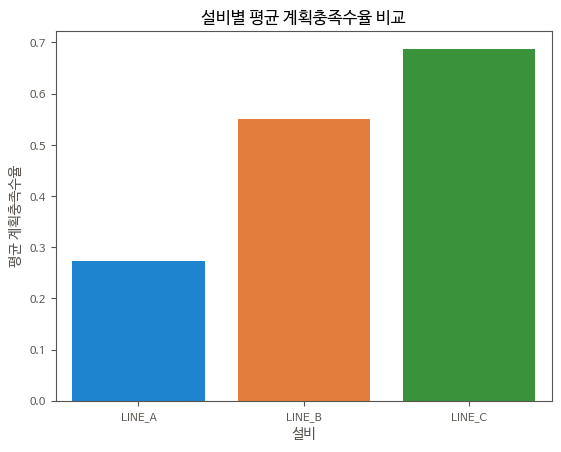

In [ ]:
#설비별 평균 생산수량
facility_total_production = merged_df.groupby('설비').agg({'계획충족수율': 'mean'}).reset_index()

sns.barplot(x='설비', y='계획충족수율', data=facility_total_production)
plt.title('설비별 평균 계획충족수율 비교')
plt.xlabel('설비')
plt.ylabel('평균 계획충족수율')

# 그래프 보여주기
plt.show()

* LINE_A-> LINE_B -> LINE_C 순으로 평균 계획충족수율이 높다.
* 평균 계획충족수율의 차이가 비교적 크게 발생한다.

즉, 설비에 따라 생산성이 달라진다는 가설을 세워 볼 수 있다.

■ **가설도출** : 설비는 생산성에 영향을 미친다.

###**입력변수** : 근무조

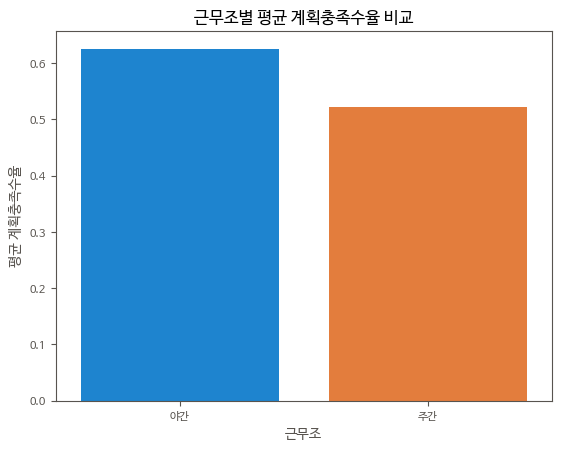

In [ ]:
#근무조별 평균 계획충족수
facility_total_production = merged_df.groupby('근무조').agg({'계획충족수율': 'mean'}).reset_index()

sns.barplot(x='근무조', y='계획충족수율', data=facility_total_production)
plt.title('근무조별 평균 계획충족수율 비교')
plt.xlabel('근무조')
plt.ylabel('평균 계획충족수율')

# 그래프 보여주기
plt.show()

* 야간 근무조의 평균 계획충족수율이 주간에 비해 약 0.1 높다.


즉, 근무조에 따라 생산성이 달라진다는 가설을 세워 볼 수 있다.

■ **가설도출** : 근무조는 생산성에 영향을 미친다.

###**입력변수**: 모델

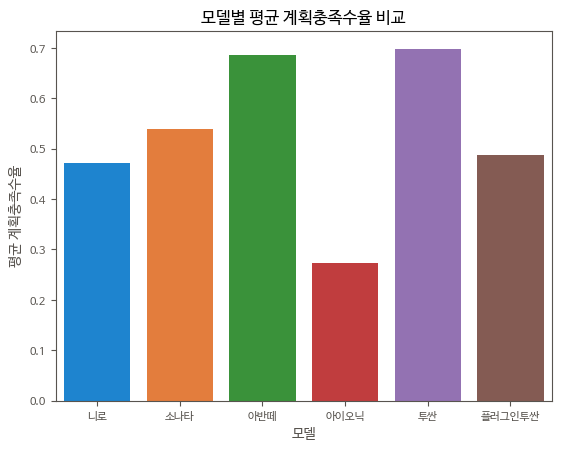

In [ ]:
#모델별 평균 계획충족수율
facility_total_production = merged_df.groupby('모델').agg({'계획충족수율': 'mean'}).reset_index()

sns.barplot(x='모델', y='계획충족수율', data=facility_total_production)
plt.title('모델별 평균 계획충족수율 비교')
plt.xlabel('모델')
plt.ylabel('평균 계획충족수율')

# 그래프 보여주기
plt.show()

* 아이오닉의 평균 계획충족수율이 가장 낮다.
* 아반떼와 투싼의 평균 계획충족수율이 비교적 높다.

즉, 모델에 따라 생산성이 달라진다는 가설을 세워 볼 수 있다.

■ **가설도출** : 모델은 생산성에 영향을 미친다.

### **1차적인 입력 변수들의 분석을 완료하였다.**

 분석을 마친 결과 위와같은 정보들을 알게되었다.
<br>이 정보들을 바탕으로 입력변수간의 **교차분석을 진행한다.**


## **입력변수 교차분석**

###**설비별 모델 생산 비율**

<Figure size 1200x800 with 0 Axes>

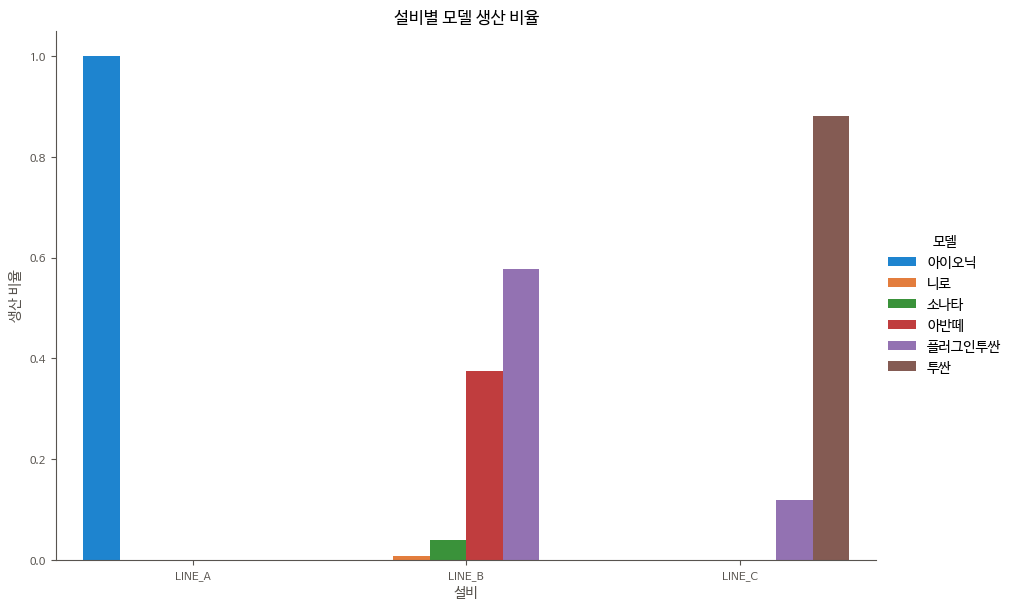

In [ ]:
#입력변수 : 모델, 설비

# 설비별 모델 생산 횟수 구하기
facility_model_counts = merged_df.groupby(['설비', '모델']).size().reset_index(name='생산횟수')
# 설비별로 생산 횟수를 정규화하여 비율 계산
facility_model_counts['생산비율'] = facility_model_counts.groupby('설비')['생산횟수'].transform(lambda x: x / x.sum())

# 팩터플롯으로 시각화
plt.figure(figsize=(12, 8))
sns.catplot(x='설비', y='생산비율', hue='모델', data=facility_model_counts, kind='bar', height=6, aspect=1.5)
plt.title('설비별 모델 생산 비율')
plt.xlabel('설비')
plt.ylabel('생산 비율')
plt.show()

* LINE_A에서는 아이오닉만 생산을 한다.
* LINE_B에서는 플러그인 투싼과 아반떼의 생산 비율이 높다.
* LINE_C에서는 투싼의 생산비율이 높다.

*  이전 설비별 평균 계획충족수율이 LINE_C-> LINE_B-> LINE_A 순으로 나타났다.<br>
그리고 모델별 평균 계획충족수율을 확인해 보았을때, 투싼과 플러그인 투싼은 평균 계획충족수율이 높게 나왔고,<br> 아이오닉의 평균 계획충족수율이 가장 낮게 나왔다.

***->>*** 즉, 설비별로 생산하는 모델의 비율이 서로 다르다는 것을 알 수 있다. 이를 통해서 우리는 설비의 생산성은 모델에 영향을 받는 다는 가설을 세워볼 수 있습니다.

■ **가설도출** : 설비별 평균 계획충족수율은 설비별 모델 생산 비율에 영향을 받는다.

###**근무조별 모델 생산 비율**

<Figure size 1200x800 with 0 Axes>

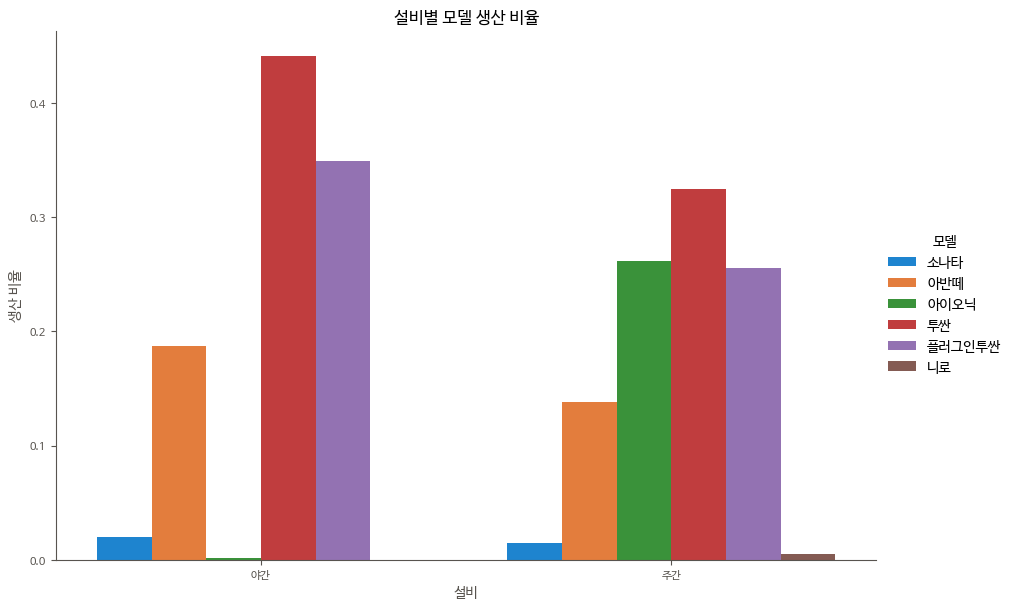

In [ ]:
#입력변수 : 모델, 근무조

# 근무조별 모델 생산 횟수 구하기
facility_model_counts = merged_df.groupby(['근무조', '모델']).size().reset_index(name='근무일수')

# 근무조별로 생산 횟수를 정규화하여 비율 계산
facility_model_counts['근무비율'] = facility_model_counts.groupby('근무조')['근무일수'].transform(lambda x: x / x.sum())

# 팩터플롯으로 시각화
plt.figure(figsize=(12, 8))
sns.catplot(x='근무조', y='근무비율', hue='모델', data=facility_model_counts, kind='bar', height=6, aspect=1.5)
plt.title('설비별 모델 생산 비율')
plt.xlabel('설비')
plt.ylabel('생산 비율')
plt.show()

* 야간 근무조에서는 아이오닉과 니로의 생산비율이 매우 낮다.
* 주간 근무조는 아이오닉과 니로의 생산비율이 야간에 비해 높게 나왔습니다.


***->>*** 즉, 두 근무조간의 모델의 생산비율이 다르게 나왔으므로 근무조의 생산성은 근무조별 모델 생산비율에 영향을 받는다는 가설을 세워보았다.
<br>
<br>
■ **가설도출** : 근무조별 평균 계획충족수율은 근무조별 모델 생산 비율에 영향을 받는다.

###**근무조별 설비가동 비율**

<Figure size 1200x800 with 0 Axes>

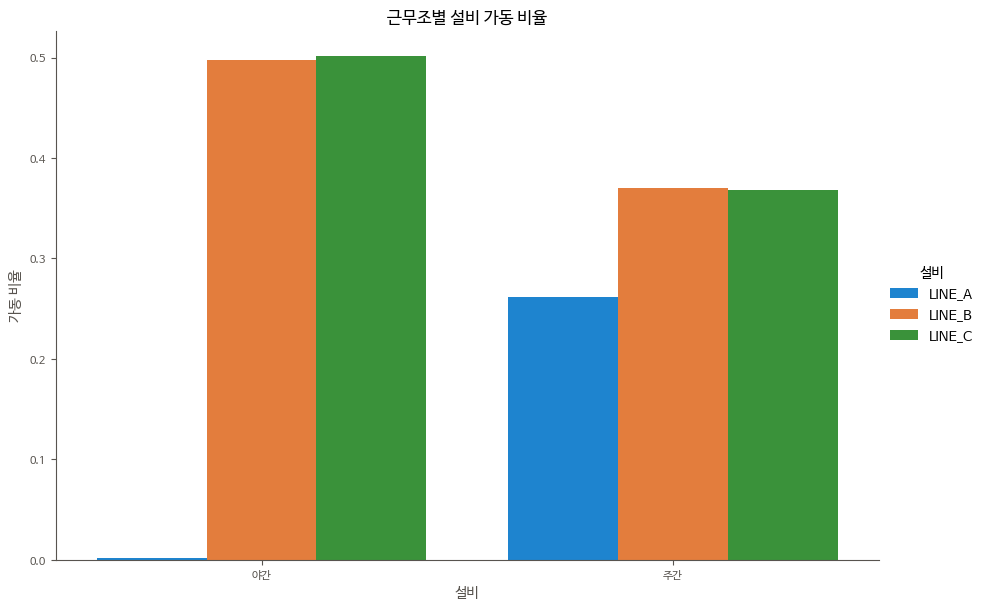

In [ ]:
#입력변수 : 설비, 근무조

# 근무조별 설비 가동 횟수 구하기
facility_model_counts = merged_df.groupby(['근무조', '설비']).size().reset_index(name='가동일수')

# 설비별로 가동 횟수를 정규화하여 비율 계산
facility_model_counts['가동비율'] = facility_model_counts.groupby('근무조')['가동일수'].transform(lambda x: x / x.sum())

# 팩터플롯으로 시각화
plt.figure(figsize=(12, 8))
sns.catplot(x='근무조', y='가동비율', hue='설비', data=facility_model_counts, kind='bar', height=6, aspect=1.5)
plt.title('근무조별 설비 가동 비율')
plt.xlabel('설비')
plt.ylabel('가동 비율')
plt.show()

* 야간 근무조에서는 LINE_B와  LINE_C의 가동비율이 지배적이다.
* 주간 근무조에서는  LINE_A의 가동비율이 야간에 비해서 매우 높게 나온다.


***->>*** 즉, 야간과 주간의 설비의 가동비율이 서로 다르게 나왔으므로, 근무조의 생산성은 근무조별 설비가동 비율에 영향을 받는다는 가설을 세웠다.
<br>
<br>
■ **가설도출** : 근무조별 평균 계획충족수율은 근무조별 설비 가동비율에 영향을 받는다.

## 가설
1. **입력변수 : 설비 분석**에서 얻은 정보를 근거로 ***'설비는 생산성에 영향을 미친다.'*** 는 가설을 수립한다.

2. **입력변수 :  근무조 분석**에서 얻은 정보를 근거로 ***'근무조는 생산성에 영향을 미친다.'*** 는 가설을 수립한다.
3. **입력변수 : 모델 분석**에서 얻은 정보를 근거로 ***'모델은 생산성에 영향을 미친다.'*** 는 가설을 수립한다.
4. **설비별 모델 생산 비율**에서 얻은 정보를 근거로 ***'설비별 평균 계획충족수율은 설비별 모델 생산비율에 영향을 받는다.'*** 는 가설을 수립한다.
5. **근무조별 모델 생산 비율**에서 얻은 정보를 근거로 ***'근무조별 평균 계획충족수율은 근무조별 모델 생산비율에 영향을 받는다.'*** 는 가설을 수립한다.
6. **근무조별 설비 가동 비율**에서 얻은 정보를 근거로 ***'근무조별 평균 계획충족수율은 근무조별 설비 가동비율에 영향을 받는다.'*** 는 가설을 수립한다.


# 4. 데이터 분석

 위에서 EDA를 진행해본 결과 총 6개의 가설을 세워볼 수 있었다. <br>그리고, 이 가설들이 유의미한지 판단하기 위해서 **가설검정**을 실시한다.





##**가설검정**

### **1번 가설**

1번 가설검정 : ***'설비는 생산성에 영향을 미친다.'*** 를 유의수준 5%에서 검정한다.

귀무가설 - $H_0 : μ_1 = μ_2 = ... = μ_k$ <br>
대립가설 - $H_1 : μ_i \neq μ_j$ for some i and j

설비는 명목형 변수이고,
계획충족수율은 연속형 변수이므로 <br>
ANOVA 분석으로 검정을 진행한다.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('계획충족수율 ~ C(설비)', merged_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(설비),2.000,31.812,15.906,718.333,0.000
Residual,1643.000,36.381,0.022,NaN,NaN


위에서 P-Value가 0.05보다 작기 때문에 귀무가설을 기각한다.<br>
**즉, 설비는 생산성에 유의미한 영향을 미친다고 볼 수 있다**

### **2번 가설**

2번 가설검정 : ***'근무조는 생산성에 영향을 미친다.'*** 를 유의수준 5%에서 검정한다.

귀무가설 - $H_0 : μ_1 = μ_2 = ... = μ_k$ <br>
대립가설 - $H_1 : μ_i \neq μ_j$ for some i and j

근무조는 명목형 변수이고,
계획충족수율은 연속형 변수이므로 <br>
ANOVA 분석으로 검정을 진행한다.

In [ ]:
model = ols('계획충족수율 ~ C(근무조)', merged_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(근무조),1.000,4.242,4.242,109.037,0.000
Residual,1644.000,63.952,0.039,NaN,NaN


위에서 P-Value가 0.05보다 작기 때문에 귀무가설을 기각한다.<br>
**즉, 근무조는 생산성에 유의미한 영향을 미친다고 볼 수 있다**

### **3번 가설**

3번 가설검정 : ***'모델은 생산성에 영향을 미친다.'*** 를 유의수준 5%에서 검정한다.

귀무가설 - $H_0 : μ_1 = μ_2 = ... = μ_k$ <br>
대립가설 - $H_1 : μ_i \neq μ_j$ for some i and j <br>

모델은 명목형 변수이고,
계획충족수율은 연속형 변수이므로 <br>
ANOVA 분석으로 검정을 진행한다.

In [ ]:
model = ols('계획충족수율 ~ C(모델)', merged_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(모델),5.000,38.876,7.775,434.932,0.000
Residual,1640.000,29.318,0.018,NaN,NaN


위에서 P-Value가 0.05보다 작기 때문에 귀무가설을 기각한다.<br>
**즉, 모델은 생산성에 유의미한 영향을 미친다고 볼 수 있다**

우리는 1~4번의 가설검정의 결과로
설비, 근무조 , 모델이 생산성에 영향을 끼친다는 것을 알게 되었다.<br>

### **4번 가설**

4번 가설검정 :***'설비별 평균 계획충족수율은 설비별 모델 생산비율에 영향을 받는다.'***를 유의수준 5%에서 검정한다.

귀무가설 - $H_0 : P_{ij} = P_{i̇⋅} × P_{⋅j}  $ <br>
대립가설 - $H_1 : P_{ij} \neq P_{i̇⋅} × P_{⋅j}  $

위의 가설은 설비의 생산성이 모델에 영향을 받는다는 것과 같다. <br>
그러므로 둘 다 명목형 변수이기 때문에 카이제곱 독립성 검정을 진행한다.

In [ ]:
# 교차표(Contingency Table)
ct = pd.crosstab(merged_df.설비,merged_df.모델)
ct

모델,니로,소나타,아반떼,아이오닉,투싼,플러그인투싼
설비,,,,,,
LINE_A,0,0,0,249,0,0
LINE_B,5,28,262,0,0,403
LINE_C,0,0,0,0,616,83


In [ ]:
from scipy import stats

chi2, pval, dof, expected = stats.chi2_contingency(ct)

In [ ]:
print('chi2:', round(chi2, 4))
print('p-value:', round(pval, 4))
print('Expected: \n', expected)

chi2: 2967.6301
p-value: 0.0
Expected: 
 [[  0.7563791    4.23572296  39.63426488  37.66767922  93.18590522
   73.5200486 ]
 [  2.12029162  11.87363305 111.10328068 105.59052248 261.2199271
  206.09234508]
 [  2.12332928  11.89064399 111.26245443 105.7417983  261.59416768
  206.38760632]]


위에서 P-Value가 0.05보다 작기 때문에 귀무가설을 기각한다.<br>
**즉, 모델은 설비의 생산성에 유의미한 영향을 미친다고 볼 수 있다**

### **5번 가설**

 5번 가설검정 : ***'근무조별 평균 계획충족수율은 근무조별 모델 생산비율에 영향을 받는다.'***를 유의수준 5%에서 검정한다.

귀무가설 - $H_0 : P_{ij} = P_{i̇⋅} × P_{⋅j}  $ <br>
대립가설 - $H_1 : P_{ij} \neq P_{i̇⋅} × P_{⋅j}  $


위의 가설은 근무조의 생산성이 모델에 영향을 받는다는 것과 같다. <br>
그러므로 둘 다 명목형 변수이기 때문에 카이제곱 독립성 검정을 진행한다.

In [ ]:
# 교차표(Contingency Table)
ct = pd.crosstab(merged_df.근무조,merged_df.모델)
ct

모델,니로,소나타,아반떼,아이오닉,투싼,플러그인투싼
근무조,,,,,,
야간,0,14,131,1,308,244
주간,5,14,131,248,308,242


In [ ]:
chi2, pval, dof, expected = stats.chi2_contingency(ct)

print('chi2:', round(chi2, 4))
print('p-value:', round(pval, 4))
print('Expected: \n', expected)

chi2: 217.0607
p-value: 0.0
Expected: 
 [[  2.12029162  11.87363305 111.10328068 105.59052248 261.2199271
  206.09234508]
 [  2.87970838  16.12636695 150.89671932 143.40947752 354.7800729
  279.90765492]]


위에서 P-Value가 0.05보다 작기 때문에 귀무가설을 기각한다.<br>
**즉, 모델은 근무조의 생산성에 유의미한 영향을 미친다고 볼 수 있다**

### **6번 가설**

 6번 가설검정 : ***'근무조별 평균 계획충족수율은 근무조별 설비 가동비율에 영향을 받는다.'***를 유의수준 5%에서 검정한다.

귀무가설 - $H_0 : P_{ij} = P_{i̇⋅} × P_{⋅j}  $ <br>
대립가설 - $H_1 : P_{ij} \neq P_{i̇⋅} × P_{⋅j}  $


위의 가설은 근무조의 생산성이 설비에 영향을 받는다는 것과 같다. <br>
그러므로 둘 다 명목형 변수이기 때문에 카이제곱 독립성 검정을 진행한다.

In [ ]:
# 교차표(Contingency Table)
ct = pd.crosstab(merged_df.근무조,merged_df.설비)
ct

설비,LINE_A,LINE_B,LINE_C
근무조,,,
야간,1,347,350
주간,248,351,349


In [ ]:
chi2, pval, dof, expected = stats.chi2_contingency(ct)

print('chi2:', round(chi2, 4))
print('p-value:', round(pval, 4))
print('Expected: \n', expected)

chi2: 211.9592
p-value: 0.0
Expected: 
 [[105.59052248 295.9927096  296.41676792]
 [143.40947752 402.0072904  402.58323208]]


위에서 P-Value가 0.05보다 작기 때문에 귀무가설을 기각한다.<br>
**즉, 설비는 근무조의 생산성에 유의미한 영향을 미친다고 볼 수 있다**

# 5. 결론

우리는 위에서 가설검정을 통해 아래의 정보를 얻었다.

1. 설비, 근무조, 모델은 **생산성**에 영향을 미친다.
2. 설비와 근무조, 모델은 **서로의 생산성**에 영향을 미친다.


설비, 근무조, 모델은 모두 생산성에 영향을 미치고, 서로 상관관계를 가진다는 것을 알게 되었지만 이것은 인과관계가 아니다.

<br>

예를 들면, LINE_A 생산성이 낮은 원인이 아이오닉 모델인지, 아이오닉 모델의 생산성이 낮은 원인이 LINE_A에 있는지를 알 수는 없었습니다.

<br>


우리는 생산선 개선을 위해 생산성을 저하시키는 **원인**을 찾아서 개선해야 한다.

원인을 찾기 위해서는 위의 세 가지 변수에 대한 추가적인 분석이나 **실험**을 진행해야한다.

하지만, 생산현에서의 실험은 작업의 흐름에 영향을 주거나 금전적 손실이 발생할 수 있으므로,
**실험의 계획**을 잘 세워야 할 것이다..

<br>

만약, 실험을 통해 생산성 저하의 원인을 알아냈다면,<br> 그 원인을 개선하고 문제를 해결할 방안을 찾아내 생산성 향상을 예측해보고 도입하여 ***생산성을 향상시킨다.***







# 참고문헌

https://chat.openai.com/